# Import Library and Forming function

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox

In [2]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [3]:
def plot_coef(X,model,name=None):
    

    plt.bar(X.columns[2:],abs(model.coef_[2:]))
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R^2 on training  data ",model.score(X_train, y_train))
    print("R^2 on testing data ",model.score(X_test,y_test))

In [4]:
def plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

#1. DATA OVERVIEW

###Data Dictionary
**TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

**avgAnnCount**: Mean number of reported cases of cancer diagnosed annually(a)

**avgDeathsPerYear**: Mean number of reported mortalities due to cancer(a)

**incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

**medianIncome**: Median income per county (b)

**popEst2015**: Population of county (b)

**povertyPercent**: Percent of populace in poverty (b)

**studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

**binnedInc**: Median income per capita binned by decile (b)

**MedianAge**: Median age of county residents (b)

**MedianAgeMale**: Median age of male county residents (b)

**MedianAgeFemale**: Median age of female county residents (b)

**Geography**: County name (b)

**AvgHouseholdSize**: Mean household size of county (b)

**PercentMarried**: Percent of county residents who are married (b)

**PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

**PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

**PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

**PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

**PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

**PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

**PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

**PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

**PctPrivateCoverage**: Percent of county residents with private health coverage (b)

**PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

**PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

**PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

**PctPubliceCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

**PctWhite**: Percent of county residents who identify as White (b)

**PctBlack**: Percent of county residents who identify as Black (b)

**PctAsian**: Percent of county residents who identify as Asian (b)

**PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

**PctMarriedHouseholds**: Percent of married households (b)

**BirthRate**: Number of live births relative to number of women in county (b)

In [5]:
URL = 'https://query.data.world/s/wwexdxbbtgdfvuzfkpnqm4aexnlkac'

df = pd.read_csv(URL, encoding='latin-1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [7]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Xuất hiện missing value ở 3 cột -> thay thế bằng mean value

In [24]:
# Find missing value
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols_with_nan = [col for col in num_cols if df[col].isnull().sum() > 0]

# Replace missing values with mean value
for col in num_cols_with_nan:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)


In [25]:
df.tail()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,...,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [10]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [11]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,9.018885,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,43.100000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.453774,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,53.800000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


#EXPLORATORY DATA ANALYSIS

In [12]:
# Counting Value of TARGET_deathRate column
df['TARGET_deathRate'].value_counts().to_frame()

,TARGET_deathRate
184.3,11
179.9,10
182.8,10
173.6,10
176.4,10
...,...
141.1,1
141.5,1
152.0,1
143.3,1


In [13]:
#looking for correlation
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['TARGET_deathRate'][:-1]
df_num_corr.sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctUnemployed16_Over       0.378412
PctHS18_24                 0.261976
PctBlack                   0.257024
PctNoHS18_24               0.088463
MedianAgeFemale            0.012048
MedianAge                  0.004375
MedianAgeMale             -0.021929
studyPerCap               -0.022285
AvgHouseholdSize          -0.036905
avgDeathsPerYear          -0.090715
PctSomeCol18_24           -0.094765
popEst2015                -0.120073
avgAnnCount               -0.143532
PctWhite                  -0.177400
PctAsian                  -0.186331
PctOtherRace              -0.189894
PercentMarried            -0.266820
PctEmpPrivCoverage        -0.267399
PctBachDeg18_24           -0.287817
PctMarriedHouseholds      -0.293325
PctPrivateCoverageAlone   -0.326067
PctPrivateCoverage        -0

The incidence rate of cancer diagnoses per 100,000 people has a direct correlation with the TARGET_deathRate, as the mortality rate tends to increase with an increase in the number of people diagnosed with cancer.


The percentage of county residents aged 25 and above who have attained a bachelor's degree (PctBachDeg25_Over) has an inverse relationship with the TARGET_deathRate. This is because higher education levels are associated with increased knowledge about health, and individuals may be aware of ways to lower cancer rates.

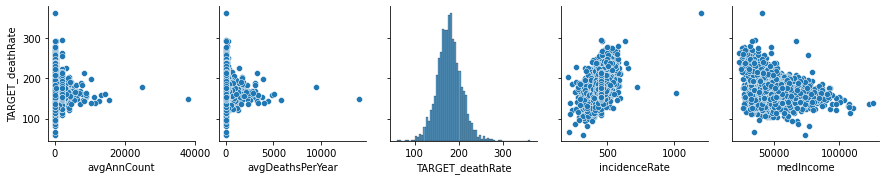

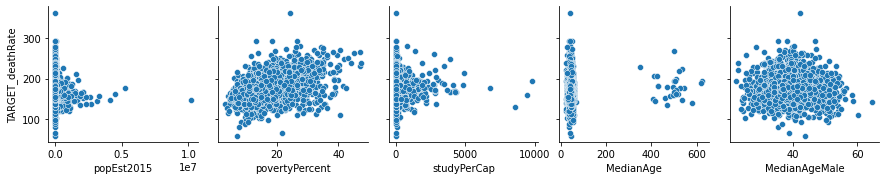

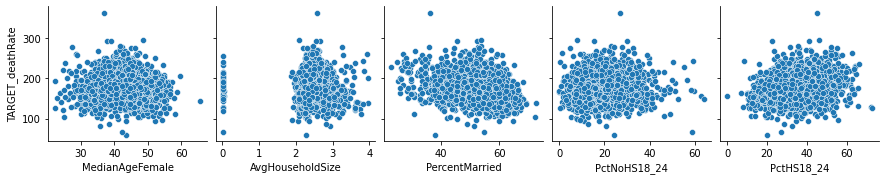

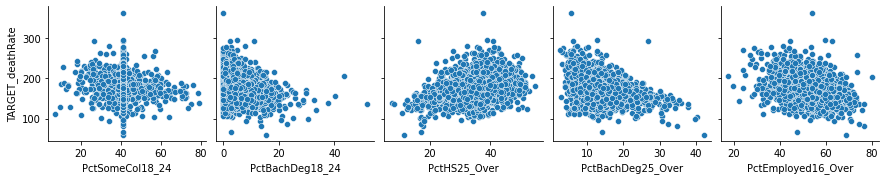

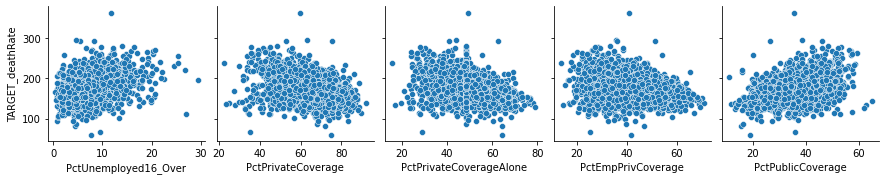

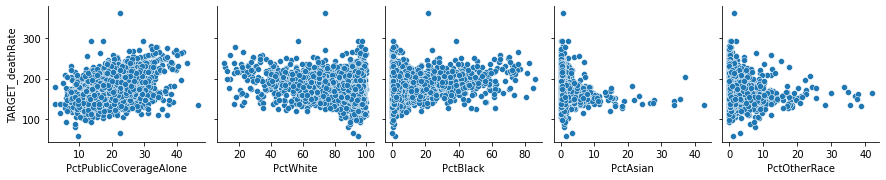

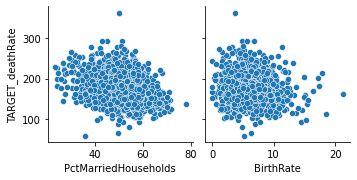

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['TARGET_deathRate'])

 # APPLYING LINEAR REGRESSION

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X = df_num.drop('TARGET_deathRate', axis=1)
y = df_num['TARGET_deathRate']

 Dividing the data into training and testing sets using the "train_test_split" function, with 30% of the data allocated for testing.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 305
number of training samples: 2742


In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
predicted = lm.predict(X_test)

In [19]:
# Calculate the R^2
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.5224082091253897
R^2 on testing data  0.5257885544899353


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


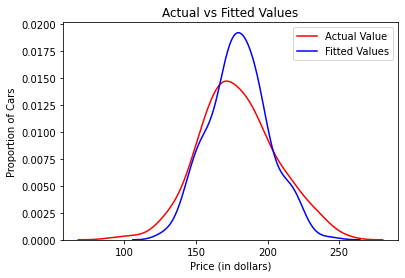

In [20]:
# DISPLAYING THE DISTRIBUTION
plot_dis(y_test,predicted)

#APPLYING POLYNOMIAL FEATURES

In [22]:
# Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


In [23]:
# Split dataset into training and testing sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_poly_train)



LinearRegression()

In [ ]:
predicted_poly = lm.predict(X_test)

In [ ]:
print("R^2 on training  data ",model.score(X_poly_train, y_poly_train))
print("R^2 on testing data ",model.score(X_poly_test,y_poly_test))

R^2 on training  data  0.7500918733398239
R^2 on testing data  -3.0758243746212948


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


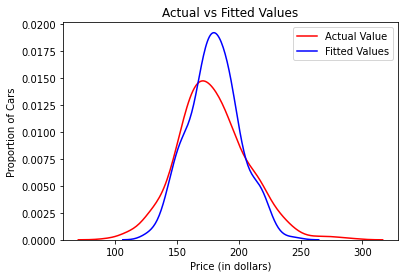

In [ ]:
plot_dis(y_poly_test,predicted)

#APPLYING REGULARIZATION

## Regularization With Ridge Regression

In [ ]:
rr = Ridge(alpha=0.01)
rr

Ridge(alpha=0.01)

In [ ]:
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [ ]:
rr.predict(X_test)

array([189.57433529, 167.70316753, 168.40694539, 189.23297167,
       184.48226011, 174.12541338, 158.7984508 , 150.22505897,
       143.28684745, 168.70700119, 141.37103265, 183.5296499 ,
       204.78172512, 183.72575476, 176.52234371, 197.10470729,
       202.09306274, 180.84431294, 216.1403031 , 179.7451035 ,
       205.08077204, 191.16946369, 167.85030142, 218.42165006,
       201.29375514, 193.24495968, 182.21347857, 172.27284755,
       213.49791038, 162.31406362, 203.27395528, 164.87013803,
       218.82979204, 191.7868947 , 214.76018588, 167.56584691,
       154.94136196, 170.75528554, 187.33002739, 208.2113699 ,
       178.89077204, 199.21974499, 170.61978765, 142.60495425,
       183.13168422, 186.07980045, 160.97828591, 154.35642623,
       191.08017902, 150.78740183, 207.83136214, 169.60274899,
       165.90814547, 226.54022638, 181.70932407, 163.40199837,
       153.20610453, 182.36270675, 194.81531441, 160.44802167,
       220.83553898, 203.52606735, 174.37899752, 218.03

In [ ]:
print("R^2 on training  data ",rr.score(X_train, y_train))
print("R^2 on testing data ",rr.score(X_test,y_test))

R^2 on training  data  0.5224082091253062
R^2 on testing data  0.52578856045069


Now let's compare the Ridge Regression and the Linear Regression  models. The results on the $R^2$ are about the same, and the coefficients seem to be smaller.


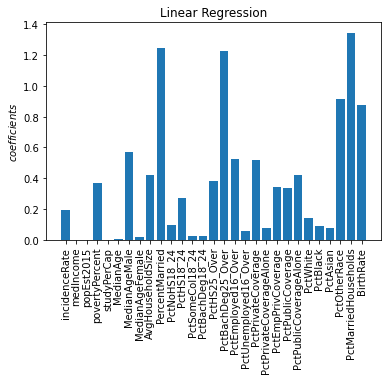

R^2 on training  data  0.5224082091253897
R^2 on testing data  0.5257885544899353


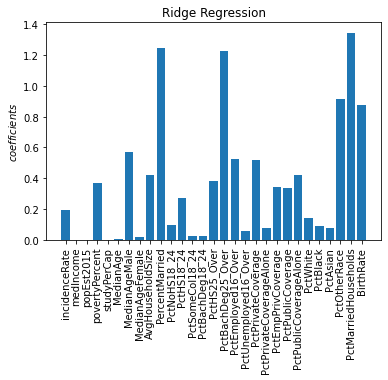

R^2 on training  data  0.5224082091253062
R^2 on testing data  0.52578856045069


In [ ]:
plot_coef(X,lm,name="Linear Regression")
plot_coef(X,rr,name="Ridge Regression")

If we increase alpha, the coefficients get smaller, but the results are not as good as our previous value of alpha.

## Regularization With Lasso Regression

In [ ]:
la = Lasso(alpha=0.1)
la.fit(X_train,y_train)
la

Lasso(alpha=0.1)

In [ ]:
predicted = la.predict(X_test)
predicted

array([189.464711  , 167.7504284 , 168.28870984, 189.3798377 ,
       184.36752324, 173.71248821, 158.74980944, 150.26933813,
       143.1106989 , 168.83501362, 140.95123201, 183.53869932,
       204.29337145, 183.74815808, 176.47256661, 196.81810052,
       201.75804298, 180.87704955, 216.1667108 , 179.81993812,
       204.899429  , 190.94192813, 167.83749925, 218.8437625 ,
       201.88729569, 193.27463617, 182.27727108, 172.07013863,
       213.89648128, 162.66321616, 203.14351039, 165.00101734,
       218.78900766, 191.68464206, 214.45720439, 167.02231769,
       154.94455466, 170.61536544, 187.28935386, 208.08682962,
       178.56380899, 199.14980775, 170.80729368, 142.67211335,
       183.01266431, 185.69951271, 160.76890549, 154.49326306,
       191.52812658, 150.60591741, 207.71057429, 169.45659887,
       166.15306258, 225.9981735 , 181.7613432 , 163.47841878,
       152.89322578, 182.43378867, 195.05895776, 160.46938394,
       220.56238602, 203.59213808, 174.27848401, 218.47

In [ ]:
print("R^2 on training  data ",la.score(X_train, y_train))
print("R^2 on testing data ",la.score(X_test,y_test))

R^2 on training  data  0.5223222553269262
R^2 on testing data  0.5255354442723439


If we compare the Lasso Regression to the  Ridge Regression model we see that the results on the $R^2$ are slightly worse, but most of the coefficients are zero.

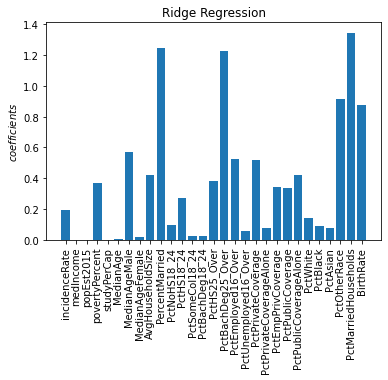

R^2 on training  data  0.5224082091253062
R^2 on testing data  0.52578856045069


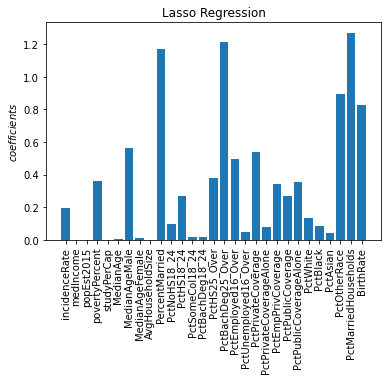

R^2 on training  data  0.5223222553269262
R^2 on testing data  0.5255354442723439


In [ ]:
plot_coef(X,rr,name="Ridge Regression")
plot_coef(X,la,name="Lasso Regression")

## Regularization With Elastic Net

Lets create a model where `alpha=0.1`and `l1_ratio=0.5` and fit the data with this model.

In [ ]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

Let's make a prediction.

In [ ]:
predicted=enet.predict(X_test)
predicted

array([189.46090972, 167.68452468, 168.29750853, 189.32181277,
       184.36089715, 173.76371654, 158.73645811, 150.29973356,
       143.21327335, 168.79846255, 141.05572424, 183.44776698,
       204.3755774 , 183.7563374 , 176.45260025, 196.83459321,
       201.77464035, 180.82750317, 216.19248556, 179.77022106,
       204.88189309, 190.99307175, 167.85671265, 218.74829031,
       201.87706699, 193.23273236, 182.2359919 , 172.11486356,
       213.81119901, 162.52625588, 203.19011974, 164.97751351,
       218.79318962, 191.67430051, 214.55192811, 167.05543217,
       154.90710595, 170.62737335, 187.28256548, 208.05955323,
       178.58369031, 199.14955605, 170.73302276, 142.71622918,
       183.01703931, 185.71528547, 160.76882701, 154.43529946,
       191.48880011, 150.69371751, 207.71008461, 169.5581887 ,
       166.06905547, 226.06579311, 181.73313808, 163.51733623,
       152.97815873, 182.41510794, 195.04609865, 160.48207876,
       220.56679727, 203.55816474, 174.28686285, 218.36

Let's calculate the $R^2$ on the test data.

In [ ]:
print("R^2 on training  data ", enet.score(X_train, y_train))
print("R^2 on testing data ", enet.score(X_test,y_test))

R^2 on training  data  0.5223374457188985
R^2 on testing data  0.5256674920482396


If we compare the Elastic Net to Lasso Regression and Ridge Regression, we see the results on the  𝑅2
  are better than the Elastic Net and many of the coefficients are zero.

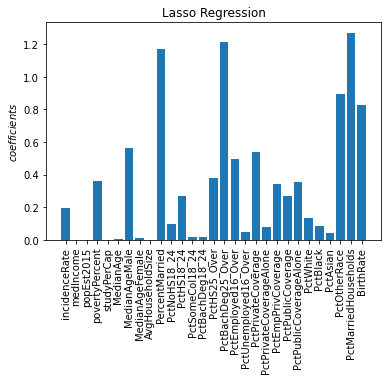

R^2 on training  data  0.5223222553269262
R^2 on testing data  0.5255354442723439


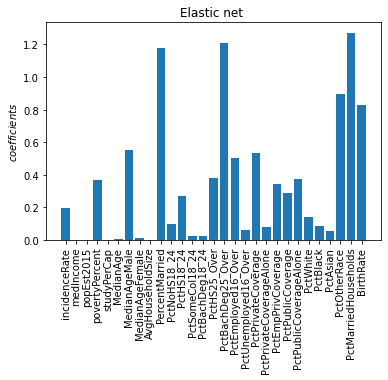

R^2 on training  data  0.5223374457188985
R^2 on testing data  0.5256674920482396


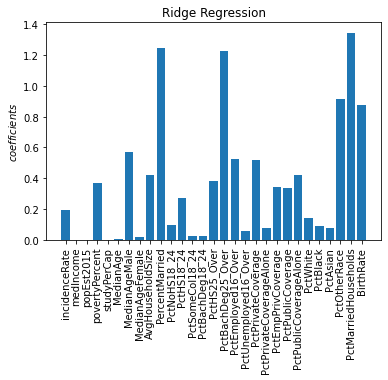

R^2 on training  data  0.5224082091253062
R^2 on testing data  0.52578856045069


In [ ]:
plot_coef(X,la,name="Lasso Regression")
plot_coef(X,enet,name="Elastic net ")
plot_coef(X,rr,name="Ridge Regression")